In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pylab as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_columns', None)





# convert csvs to dataframes
data = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    'SVR': SVR(C=1.0, epsilon=0.1, gamma='scale'),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store the RMSE for each model
rmse_scores = {}

retthetsgrad= []

trained_models = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)

    trained_models[name] = model
    
    # Calculate RMSE and store it
    rmse_scores[name] = np.sqrt(mean_squared_error(y_val, y_pred))

    retthetsgrad.append((2**y_pred)/(2**y_val))

    # Print model name and "Done!"
    print(name, 'Done!')

# Display the RMSE scores
for name, rmse in rmse_scores.items():
    print(f"{name}: RMSE = {rmse:.3f}")


LinearRegression Done!
Ridge Done!


C:\Users\olavuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.16856e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Done!
DecisionTreeRegressor Done!
RandomForestRegressor Done!
GradientBoostingRegressor Done!
SVR Done!
KNeighborsRegressor Done!
LinearRegression: RMSE = 0.516
Ridge: RMSE = 0.516
Lasso: RMSE = 0.560
DecisionTreeRegressor: RMSE = 0.515
RandomForestRegressor: RMSE = 0.495
GradientBoostingRegressor: RMSE = 0.490
SVR: RMSE = 0.914
KNeighborsRegressor: RMSE = 0.566


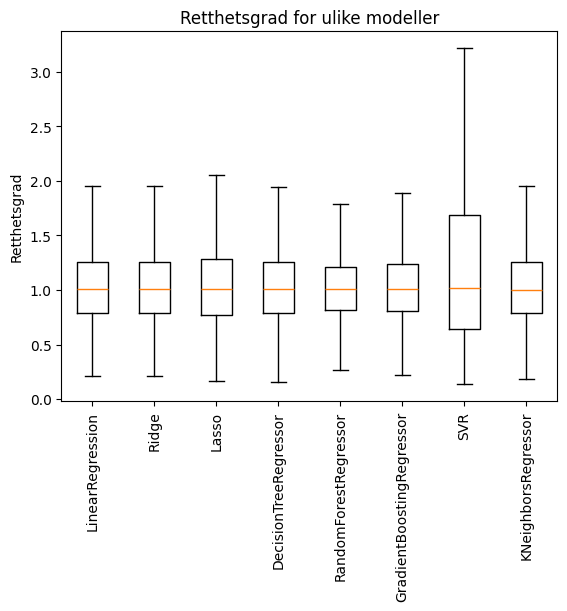

In [3]:
# Create boxplot of retthetsgrad, which is a list of lists

plt.boxplot(retthetsgrad, showfliers=False)
plt.xticks(range(1,9), models.keys(), rotation=90)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for ulike modeller')
plt.show()


In [4]:
# Predict the prices of the test_set
temp = test_set.drop('price', axis=1)
test_set['price_predicted'] = trained_models['RandomForestRegressor'].predict(temp)

In [5]:
# print fraction of nan values in all columns of test_set
print(test_set.isna().sum()/len(test_set))

host_since                                      0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
property_type                                   0.0
accommodates                                    0.0
bedrooms                                        0.0
beds                                            0.0
price                                           0.0
minimum_nights                                  0.0
maximum_nights                                  0.0
number_of_reviews                               0.0
number_of_reviews_ltm                           0.0
number_of_reviews_l30d                          0.0
review_scores_rating                            0.0
instant_bookable                                0.0
calculated_host_listings_count                  0.0
calculated_h

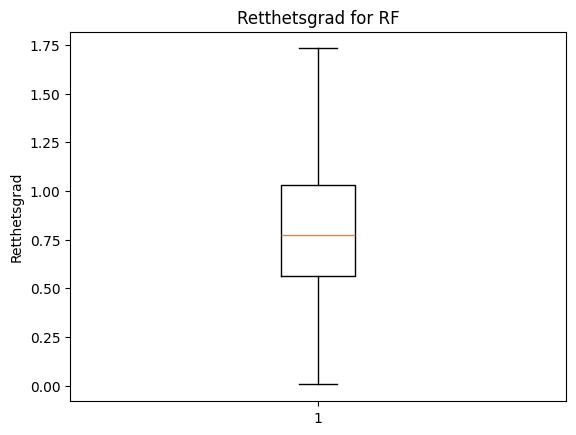

In [8]:
# create a boxplot of the predicted prices divided by the actual prices
plt.boxplot((2**test_set['price_predicted'])/(test_set['price']), showfliers=False)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for RF')
plt.show()


In [7]:
# See feature importances of random forest regressor
importances = trained_models['RandomForestRegressor'].feature_importances_


#format importances nicely
feature_importances = pd.DataFrame(importances,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
property_type,0.560370
accommodates,0.075414
neighbourhood_group_cleansed_Manhattan,0.050222
host_since,0.041938
reviews_per_month,0.031416
review_scores_rating,0.031324
host_total_listings_count,0.027238
number_of_reviews,0.025380
maximum_nights,0.024346
num_baths,0.020564
